# Homework #4: Subset Selection and Shrinkage Methods

## Background

In car sales, one of the most critical metrics is the number of days a vehicle spends on the lot. Some estimates suggest that every day a vehicle spends on the lot will cost the dealership ~$10/day in depreciation and maintenance. Multiply that by the hundreds (or thousands) of vehicles a dealership may hold in inventory and this quickly becomes one of the largest costs. A dataset provided by DriveTime, contains vehicle information as well as the number of days it spent on the lot, our task is to find any relationships that may explain the increase or decrease in days to sell.

### Relevant Datasets

`drive_time_sedans.csv`

Source: https://github.com/Fumanguyen/drivetime-sedans-used-vehicle-market/blob/master/drive_time_sedans.csv

## Task 1: Import the dataset and convert the categorical variables to dummy variables.

**Important Note**: The tasks below can be very computationally intensive. If you don't want to wait a long time for things to run or you don't feel your computer is powerful to complete these tasks in a reasonable time, I suggest dropping the `make.model`, `state`, and/or `makex` variables. Your grade will not be based on the inclusion or exclusion of any variables, I'm more interested in the methods but if you have the resources and are curious to explore more, feel free to use all variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('seaborn-white')

<ipython-input-1-ea4531972443>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
df = pd.read_csv("/content/drive_time_sedans.csv")
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,4662,18,NO,69384,FAMILY.SMALL,Import,4,FOUR,SILVER,MAZDA,TX,MAZDA.PROTEGE
2,TRAIN,4459,65,NO,58239,ECONOMY,Import,4,FOUR,RED,GEO,FL,GEO.METRO
3,TRAIN,4279,1,NO,58999,ECONOMY,Import,3,ONE-THREE,RED,KIA,TX,KIA.SEPHIA
4,TRAIN,4472,37,NO,47234,FAMILY.MEDIUM,Domestic,6,SIX,BLUE,MERCURY,NM,MERCURY.MYSTIQUE


In [ ]:
df = df.drop(['state', 'make.model', 'makex'], axis=1)

In [ ]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER
1,TRAIN,4662,18,NO,69384,FAMILY.SMALL,Import,4,FOUR,SILVER
2,TRAIN,4459,65,NO,58239,ECONOMY,Import,4,FOUR,RED
3,TRAIN,4279,1,NO,58999,ECONOMY,Import,3,ONE-THREE,RED
4,TRAIN,4472,37,NO,47234,FAMILY.MEDIUM,Domestic,6,SIX,BLUE


In [ ]:
df = pd.get_dummies(data = df, drop_first = True)

In [ ]:
df.head()

,total.cost,lot.sale.days,mileage,vehicle.age,data.set_TRAIN,data.set_VALIDATE,overage_YES,vehicle.type_FAMILY.LARGE,vehicle.type_FAMILY.MEDIUM,vehicle.type_FAMILY.SMALL,...,vehicle.age.group_ONE-THREE,vehicle.age.group_SEVEN+,vehicle.age.group_SIX,color.set_BLUE,color.set_GOLD,color.set_GREEN,color.set_PURPLE,color.set_RED,color.set_SILVER,color.set_WHITE
0,4037,135,67341,8,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,4662,18,69384,4,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,4459,65,58239,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4279,1,58999,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,4472,37,47234,6,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0


## Task 2: This dataset specifies which observations to use as train/test/validate. Split it into three dataframes based on these values.

If you've already converted those to dummy variables, you may have to subset slightly different. Search "*conditional subset pandas dataframe*" for a starting point or reach out to me (before the soft deadline) for guidance.

In [ ]:
train1 = df.loc[(df['data.set_TRAIN'] == 1) ]
train = train1.loc[(train1['data.set_VALIDATE'] == 0) ]
train = train.drop(['data.set_VALIDATE','data.set_TRAIN'],axis =1)
ytrain = train[['lot.sale.days']]
ytrain1 = train[['lot.sale.days']]
ytrain = (ytrain-ytrain.mean())/ytrain.std()
train = train.drop('lot.sale.days', axis =1)
xtrain = train
xtrain1 = train
train = pd.concat([train,ytrain],axis = 1)
train

,total.cost,mileage,vehicle.age,overage_YES,vehicle.type_FAMILY.LARGE,vehicle.type_FAMILY.MEDIUM,vehicle.type_FAMILY.SMALL,vehicle.type_LUXURY,domestic.import_Import,vehicle.age.group_FOUR,...,vehicle.age.group_SEVEN+,vehicle.age.group_SIX,color.set_BLUE,color.set_GOLD,color.set_GREEN,color.set_PURPLE,color.set_RED,color.set_SILVER,color.set_WHITE,lot.sale.days
0,4037,67341,8,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1.667730
1,4662,69384,4,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,-0.546753
2,4459,58239,4,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0.342826
3,4279,58999,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,-0.868515
4,4472,47234,6,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,-0.187136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,3791,65819,9,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,-0.679243
8749,4380,66057,6,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,-0.811733
8750,6392,100705,6,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,-0.849588
8751,4725,88144,5,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,-0.679243


In [ ]:
validate1 = df.loc[(df['data.set_TRAIN'] == 0) ]
validate = validate1.loc[(validate1['data.set_VALIDATE'] == 1) ]
validate = validate.drop(['data.set_VALIDATE','data.set_TRAIN'],axis =1)
yvalidate1 = validate[['lot.sale.days']]
yvalidate = validate[['lot.sale.days']]

yvalidate = (yvalidate-yvalidate.mean())/yvalidate.std()
validate = validate.drop('lot.sale.days', axis =1)
xvalidate = validate
xvalidate1 = validate
validate = pd.concat([validate,yvalidate],axis = 1)
validate

,total.cost,mileage,vehicle.age,overage_YES,vehicle.type_FAMILY.LARGE,vehicle.type_FAMILY.MEDIUM,vehicle.type_FAMILY.SMALL,vehicle.type_LUXURY,domestic.import_Import,vehicle.age.group_FOUR,...,vehicle.age.group_SEVEN+,vehicle.age.group_SIX,color.set_BLUE,color.set_GOLD,color.set_GREEN,color.set_PURPLE,color.set_RED,color.set_SILVER,color.set_WHITE,lot.sale.days
13129,4944,79188,5,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-0.321745
13130,5541,72594,7,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,-0.532605
13131,4870,82492,6,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,-0.149223
13132,5397,71153,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.321745
13133,4983,93462,6,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,-0.455928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,3793,48016,5,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,-0.455928
17502,5061,72985,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0.253328
17503,4857,93040,8,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,-0.743464
17504,3361,70751,8,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,-0.015039


In [ ]:
test1 = df.loc[(df['data.set_TRAIN'] == 0) ]
test = test1.loc[(test1['data.set_VALIDATE'] == 0) ]
test = test.drop(['data.set_VALIDATE','data.set_TRAIN'],axis =1)
ytest = test[['lot.sale.days']]
ytest1 = test[['lot.sale.days']]
ytest = (ytest-ytest.mean())/ytest.std()
test = test.drop('lot.sale.days', axis =1)
xtest = test
xtest1 = test
test = pd.concat([test,ytest],axis = 1)


## Task 3: Normalize `total.cost`, `mileage`, and `vehicle.age`

In [ ]:
print(train.iloc[:,0:3])

      total.cost  mileage  vehicle.age
0           4037    67341            8
1           4662    69384            4
2           4459    58239            4
3           4279    58999            3
4           4472    47234            6
...          ...      ...          ...
8748        3791    65819            9
8749        4380    66057            6
8750        6392   100705            6
8751        4725    88144            5
8752        5416    64920            4

[8753 rows x 3 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train.iloc[:,0:3]=scaler.fit_transform(train.iloc[:,0:3].to_numpy())
xtrain.iloc[:,0:3]=scaler.fit_transform(train.iloc[:,0:3].to_numpy())
xtrain


,total.cost,mileage,vehicle.age,overage_YES,vehicle.type_FAMILY.LARGE,vehicle.type_FAMILY.MEDIUM,vehicle.type_FAMILY.SMALL,vehicle.type_LUXURY,domestic.import_Import,vehicle.age.group_FOUR,vehicle.age.group_ONE-THREE,vehicle.age.group_SEVEN+,vehicle.age.group_SIX,color.set_BLUE,color.set_GOLD,color.set_GREEN,color.set_PURPLE,color.set_RED,color.set_SILVER,color.set_WHITE
0,-0.909399,-0.564531,1.452326,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,-0.240273,-0.444210,-0.825338,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0
2,-0.457605,-1.100583,-0.825338,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,-0.650313,-1.055824,-1.394754,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,-0.443687,-1.748711,0.313494,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,-1.172767,-0.654167,2.021743,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8749,-0.542183,-0.640150,0.313494,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8750,1.611867,1.400407,0.313494,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
8751,-0.172825,0.660640,-0.255922,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
validate.iloc[:,0:3]=scaler.fit_transform(validate.iloc[:,0:3].to_numpy())
xvalidate.iloc[:,0:3]=scaler.fit_transform(validate.iloc[:,0:3].to_numpy())
xvalidate

,total.cost,mileage,vehicle.age,overage_YES,vehicle.type_FAMILY.LARGE,vehicle.type_FAMILY.MEDIUM,vehicle.type_FAMILY.SMALL,vehicle.type_LUXURY,domestic.import_Import,vehicle.age.group_FOUR,vehicle.age.group_ONE-THREE,vehicle.age.group_SEVEN+,vehicle.age.group_SIX,color.set_BLUE,color.set_GOLD,color.set_GREEN,color.set_PURPLE,color.set_RED,color.set_SILVER,color.set_WHITE
13129,0.042983,0.146188,-0.233055,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13130,0.681832,-0.244083,0.917630,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
13131,-0.036204,0.341737,0.342287,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
13132,0.527738,-0.329370,-0.233055,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13133,0.084717,0.991005,0.342287,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,-1.188702,-1.698752,-0.233055,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
17502,0.168185,-0.220942,-0.808398,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
17503,-0.050116,0.966029,1.492972,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
17504,-1.650985,-0.353163,1.492972,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
test.iloc[:,0:3]=scaler.fit_transform(test.iloc[:,0:3].to_numpy())
xtest.iloc[:,0:3]=scaler.fit_transform(test.iloc[:,0:3].to_numpy())

## Task 4: Use the code from the applied lecture to perform forward stepwise selection, with the single validation set from before (as opposed to cross-validation). Return not only the AIC, BIC, and Adjusted $R^2$, as was shown in the lecture, but also the MSE on the validation set. 

In [ ]:
#xtrain, ytrain, x_validate,y_validate

In [ ]:
xtrain.shape[0]

8753

In [ ]:
def processSubset(X, y, predictor_variables, response_variable):
    # Fit model on feature_set and calculate RSS
    
    model = sm.OLS(y,X[list(predictor_variables)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(predictor_variables)]) - y[response_variable]) ** 2).sum()
    MSE = ((1/X.shape[0]) * RSS)
    return {"model":regr, "RSS":RSS, "MSE":MSE}

In [ ]:
def forward(X, y, predictors, response_variable):
    
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    t0 = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(X, y, predictors + [p], response_variable))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    t1 = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (t1-t0), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model", "AIC", "BIC", "AdjR2", "MSE"])

t0 = time.time()
predictors = []

for i in range(1,len(xtrain.columns)+1):    
    models_fwd.loc[i] = forward(xtrain, ytrain, predictors, 'lot.sale.days')
    predictors = models_fwd.loc[i]["model"].model.exog_names
    models_fwd.loc[i, 'AIC'] = models_fwd.loc[i, 'model'].aic
    models_fwd.loc[i, 'BIC'] = models_fwd.loc[i, 'model'].bic
    models_fwd.loc[i, 'AdjR2'] = models_fwd.loc[i, 'model'].rsquared_adj
    #models_fwd.loc[i, 'MSE'] = (1/8753) * forward(xtrain, ytrain, predictors, 'lot.sale.days') # 1/n*RSS

    
t1 = time.time()
print("Total elapsed time:", (t1-t0), "seconds.")

Processed  20 models on 1 predictors in 0.12642765045166016 seconds.
Processed  19 models on 2 predictors in 0.20579171180725098 seconds.
Processed  18 models on 3 predictors in 0.22524476051330566 seconds.
Processed  17 models on 4 predictors in 0.35408854484558105 seconds.
Processed  16 models on 5 predictors in 0.7248146533966064 seconds.
Processed  15 models on 6 predictors in 0.6497845649719238 seconds.
Processed  14 models on 7 predictors in 0.5714752674102783 seconds.
Processed  13 models on 8 predictors in 0.4989604949951172 seconds.
Processed  12 models on 9 predictors in 0.4179575443267822 seconds.
Processed  11 models on 10 predictors in 0.4885284900665283 seconds.
Processed  10 models on 11 predictors in 0.4159979820251465 seconds.
Processed  9 models on 12 predictors in 0.4476935863494873 seconds.
Processed  8 models on 13 predictors in 0.39262962341308594 seconds.
Processed  7 models on 14 predictors in 0.5041759014129639 seconds.
Processed  6 models on 15 predictors in 0

In [ ]:
models_fwd 

,RSS,model,AIC,BIC,AdjR2,MSE
1,3774.447466,<statsmodels.regression.linear_model.Regressio...,17479.417717,17486.494869,0.568684,0.431218
2,3376.202681,<statsmodels.regression.linear_model.Regressio...,16505.437257,16519.591561,0.614148,0.385719
3,3095.36793,<statsmodels.regression.linear_model.Regressio...,15747.284436,15768.515891,0.646203,0.353635
4,2858.017957,<statsmodels.regression.linear_model.Regressio...,15050.983966,15079.292573,0.673295,0.326519
5,2751.899319,<statsmodels.regression.linear_model.Regressio...,14721.796461,14757.18222,0.685389,0.314395
6,2638.579109,<statsmodels.regression.linear_model.Regressio...,14355.725994,14398.188905,0.69831,0.301449
7,2579.403405,<statsmodels.regression.linear_model.Regressio...,14159.186753,14208.726815,0.705043,0.294688
8,2488.019834,<statsmodels.regression.linear_model.Regressio...,13845.457403,13902.074617,0.71546,0.284248
9,2481.622026,<statsmodels.regression.linear_model.Regressio...,13824.920551,13888.614917,0.716159,0.283517
10,2472.565694,<statsmodels.regression.linear_model.Regressio...,13794.919275,13865.690793,0.717163,0.282482


17


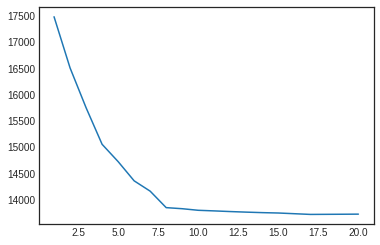

In [ ]:
print(np.argmin(models_fwd['AIC']) + 1)
plt.plot(np.arange(len(models_fwd)) + 1,models_fwd['AIC'])


17


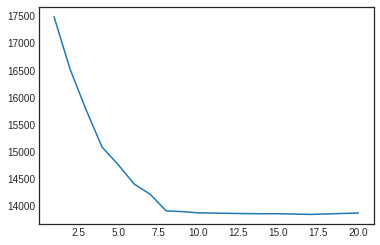

In [ ]:
print(np.argmin(models_fwd['BIC']) + 1)
plt.plot(np.arange(len(models_fwd)) + 1,models_fwd['BIC'])

17


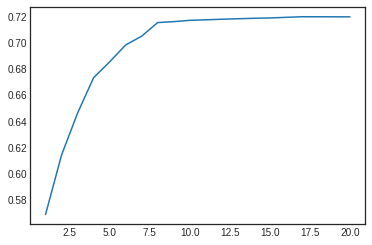

In [ ]:
print(np.argmax(models_fwd['AdjR2'])+ 1)
plt.plot(np.arange(len(models_fwd)) + 1,models_fwd['AdjR2'])

In [ ]:
models_fwd.loc[np.argmin(models_fwd['AIC']) + 1,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          lot.sale.days   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.720
Method:                 Least Squares   F-statistic:                              1324.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):                        0.00
Time:                        22:19:56   Log-Likelihood:                         -6841.2
No. Observations:                8753   AIC:                                  1.372e+04
Df Residuals:                    8736   BIC:                                  1.384e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
overage_YES                     1.9939      0.015    136.958      0.000       1.965       2.022
vehicle.type_FAMILY.MEDIUM     -0.2316      0.016    -14.211      0.000      -0.264      -0.200
domestic.import_Import         -0.0566      0.014     -4.017      0.000      -0.084      -0.029
vehicle.type_FAMILY.LARGE      -0.3112      0.020    -15.378      0.000      -0.351      -0.272
vehicle.type_FAMILY.SMALL      -0.2106      0.019    -10.925      0.000      -0.248      -0.173
vehicle.type_LUXURY            -0.3461      0.023    -15.288      0.000      -0.390      -0.302
vehicle.age                     0.0822      0.010      8.435      0.000       0.063       0.101
total.cost                      0.0980      0.006     15.253      0.000       0.085       0.111
vehicle.age.group_FOUR         -0.0859      0.019     -4.639      0.000      -0.122      -0.050
vehicle.age.group_ONE-THREE    -0.0839      0.025     -3.323      0.001      -0.133      -0.034
color.set_GREEN                -0.1521      0.019     -7.947      0.000      -0.190      -0.115
color.set_GOLD                 -0.1696      0.024     -7.198      0.000      -0.216      -0.123
color.set_SILVER               -0.1537      0.023     -6.688      0.000      -0.199      -0.109
color.set_PURPLE               -0.1401      0.023     -6.112      0.000      -0.185      -0.095
color.set_WHITE                -0.1059      0.019     -5.466      0.000      -0.144      -0.068
color.set_RED                  -0.1234      0.024     -5.136      0.000      -0.171      -0.076
color.set_BLUE                 -0.0820      0.021     -3.926      0.000      -0.123      -0.041
==============================================================================
Omnibus:                     2088.641   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4963.900
Skew:                           1.330   Prob(JB):                         0.00
Kurtosis:                       5.556   Cond. No.                         10.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
xvalidate2 = xvalidate[['overage_YES', 'vehicle.type_FAMILY.MEDIUM', 'domestic.import_Import', 'vehicle.type_FAMILY.LARGE', 'vehicle.type_FAMILY.SMALL','vehicle.type_LUXURY','vehicle.age', 'total.cost','vehicle.age.group_FOUR', 'vehicle.age.group_ONE-THREE','color.set_GREEN', 'color.set_GOLD', 'color.set_SILVER', 'color.set_PURPLE', 'color.set_WHITE', 'color.set_RED', 'color.set_BLUE']]

#Xtest = pd.get_dummies(data=Xtest, drop_first=True)
yvalidate2 = yvalidate[['lot.sale.days']]

validate_preds = models_fwd.loc[np.argmin(models_fwd['AIC']) + 1,'model'].predict(xvalidate2)

In [ ]:
validate_preds

13129   -0.416179
13130   -0.251001
13131   -0.415678
13132   -0.352778
13133   -0.398212
           ...   
17501   -0.274258
17502   -0.241734
17503   -0.267495
17504   -0.144894
17505   -0.440441
Length: 4377, dtype: float64

In [ ]:
validate[['lot.sale.days']]

,lot.sale.days
13129,-0.321745
13130,-0.532605
13131,-0.149223
13132,-0.321745
13133,-0.455928
...,...
17501,-0.455928
17502,0.253328
17503,-0.743464
17504,-0.015039


In [ ]:
validate_preds.shape

(4377,)

In [ ]:
validate['lot.sale.days'].shape
         

(4377,)

In [ ]:
np.sqrt(((validate_preds - validate['lot.sale.days'])**2).mean())


0.5412464980607938

In [ ]:
mean_squared_error(yvalidate2,validate_preds)

0.2929477716630729

## Task 5: Using the code from the shrinkage methods lecture, find the optimal $\alpha$ and $\lambda$ for an Elastic Net regression using Cross-Validation.

Note: Remember that $\lambda$ is the argument `alpha` in scikit-learn and $\alpha$ is the `l1_ratio` argument. Sorry that nobody can settle on terminology.

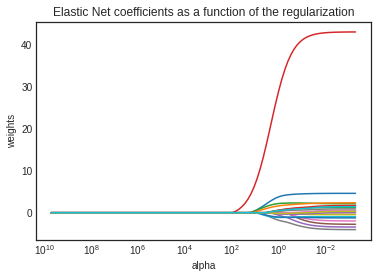

In [ ]:
alphas = 10**np.linspace(10,-3,100)*0.5
l1_ratio = 0.5 #mixing parameter

en = ElasticNet(max_iter=10000)
coefs = []

for a in alphas:
    en.set_params(alpha=a, l1_ratio=l1_ratio)
    en.fit(scale(xtrain1), ytrain1)
    coefs.append(en.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Elastic Net coefficients as a function of the regularization');

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(xtrain1)

In [ ]:
folds = np.random.choice(a = 10, size = xtrain1.shape[0])
alphas = np.linspace(0.01,3,10)
l1_ratio = np.linspace(0.01,1,10)

mse_list = []
alpha_list = []
l1_list = []
for alpha in alphas:
    for l1 in l1_ratio:
        cv_list = []
        for i in range(10):
            val_folds_X = xtrain1.iloc[np.where(folds == i)]
            train_folds_X = xtrain1.iloc[np.where(folds != i)]

            val_folds_y = ytrain1.iloc[np.where(folds == i)]
            train_folds_y = ytrain1.iloc[np.where(folds != i)]

            encv = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=10000)
            encv.fit(scaler.transform(train_folds_X), train_folds_y)
            pred = encv.predict(scaler.transform(val_folds_X))
            cv_list.append(mean_squared_error(val_folds_y, pred))
        mse_list.append(np.mean(cv_list))
        alpha_list.append(alpha)
        l1_list.append(l1)

<Axes: xlabel='l1_ratio', ylabel='alpha'>

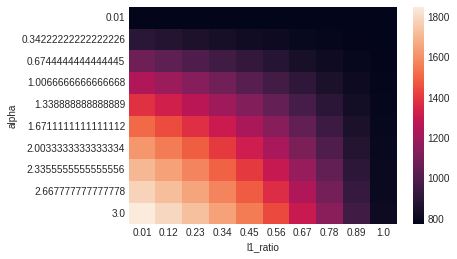

In [ ]:
plotdata = pd.DataFrame({'alpha': alpha_list, 'l1_ratio': l1_list, 'mse': mse_list})
plot_data_pivoted = plotdata.pivot("alpha", "l1_ratio", "mse")
sns.heatmap(plot_data_pivoted)

In [ ]:
opt_lambda = alpha_list[np.argmin(mse_list)]
opt_l1 = l1_list[np.argmin(mse_list)]
print(opt_lambda, opt_l1)

0.01 0.78


In [ ]:
yvalidate2

,lot.sale.days
13129,-0.321745
13130,-0.532605
13131,-0.149223
13132,-0.321745
13133,-0.455928
...,...
17501,-0.455928
17502,0.253328
17503,-0.743464
17504,-0.015039


In [ ]:
xvalidate1

,total.cost,mileage,vehicle.age,overage_YES,vehicle.type_FAMILY.LARGE,vehicle.type_FAMILY.MEDIUM,vehicle.type_FAMILY.SMALL,vehicle.type_LUXURY,domestic.import_Import,vehicle.age.group_FOUR,vehicle.age.group_ONE-THREE,vehicle.age.group_SEVEN+,vehicle.age.group_SIX,color.set_BLUE,color.set_GOLD,color.set_GREEN,color.set_PURPLE,color.set_RED,color.set_SILVER,color.set_WHITE
13129,0.042983,0.146188,-0.233055,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13130,0.681832,-0.244083,0.917630,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
13131,-0.036204,0.341737,0.342287,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
13132,0.527738,-0.329370,-0.233055,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13133,0.084717,0.991005,0.342287,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,-1.188702,-1.698752,-0.233055,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
17502,0.168185,-0.220942,-0.808398,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
17503,-0.050116,0.966029,1.492972,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
17504,-1.650985,-0.353163,1.492972,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
opt_en = ElasticNet()
opt_en.set_params(alpha=opt_lambda, l1_ratio=opt_l1, max_iter=10000)
opt_en.fit(scaler.transform(xtrain1), ytrain)
mean_squared_error(yvalidate, opt_en.predict(scaler.transform(xvalidate1)))

0.289864253564678

In [ ]:
pd.Series(opt_en.coef_.flatten(), index=xtrain1.columns)

total.cost                     0.063808
mileage                       -0.000503
vehicle.age                    0.063735
overage_YES                    0.814382
vehicle.type_FAMILY.LARGE     -0.015419
vehicle.type_FAMILY.MEDIUM    -0.000000
vehicle.type_FAMILY.SMALL     -0.000000
vehicle.type_LUXURY           -0.030694
domestic.import_Import        -0.000000
vehicle.age.group_FOUR        -0.004365
vehicle.age.group_ONE-THREE   -0.000000
vehicle.age.group_SEVEN+       0.006490
vehicle.age.group_SIX          0.004366
color.set_BLUE                 0.013775
color.set_GOLD                -0.002232
color.set_GREEN               -0.000000
color.set_PURPLE              -0.000000
color.set_RED                  0.004098
color.set_SILVER              -0.000000
color.set_WHITE                0.008444
dtype: float64

## Question: Given all of the results you've found, which model would you choose and why? Hint: There is no right answer but you will need to justify any answer you give.

I would choose the model of 13 predictor variables that was found using elastic net, because it  was able to provide nearly the same AIC ,BIC, and adjusted R^2 as the 17 predictor variable model found with forward stepwise function above. The 13 variable predictor variable also had a lower MSE value as well compared to the 17 variable predictor model. 